## Getting Data from the Web

In this section, we will cover the basics of web scraping, the tools we'll use, and the ethical considerations involved. We will also discuss using APIs when available.

### Web Scraping

Web scraping is the process of extracting data from websites. It involves parsing the HTML structure of a webpage and extracting the desired information. Python provides several libraries for web scraping, such as BeautifulSoup and Scrapy.

### Tools for Web Scraping

1. [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/): A Python library for parsing HTML and XML documents. It provides a simple and intuitive API for navigating and searching the parsed data.
2. [Scrapy](https://scrapy.org/): A powerful and flexible web scraping framework written in Python. It allows you to define the structure of the website you want to scrape and provides tools for extracting data efficiently.

### Ethical Considerations

When web scraping, it is important to consider the ethical implications and legal restrictions. Here are some key points to keep in mind:

- Respect website terms of service: Make sure to review the terms of service of the website you are scraping and comply with any restrictions or guidelines.

- Don't overload the server: Avoid sending too many requests to a website in a short period of time, as it can put a strain on the server and disrupt the website's normal operation.

- Respect privacy: Be mindful of the data you are scraping and ensure that you are not violating any privacy laws or collecting sensitive information without consent.

### Using APIs

In some cases, websites provide APIs (Application Programming Interfaces) that allow developers to access and retrieve data in a structured and controlled manner. APIs provide a more reliable and efficient way to obtain data compared to web scraping. When available, it is recommended to use APIs instead of web scraping, as it ensures that you are accessing the data in a legitimate and authorized manner. In the next section, we will explore how to use APIs to retrieve data from the web.

### Other tools
Just grabbing data from the web is not enough. We need to store it, process it, and analyze it. For this, we will use the following tools:
* [pandas](https://pandas.pydata.org/): A powerful data manipulation and analysis library for Python. It provides data structures and functions for working with structured data, making it easy to clean, transform, and analyze data.
* [numpy](https://numpy.org/doc/): A fundamental package for scientific computing with Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.
* [matplotlib](https://matplotlib.org/): A plotting library for the Python programming language and its numerical mathematics extension, NumPy. It provides a MATLAB-like interface for creating visualizations and plots. 
* [seaborn](https://seaborn.pydata.org/): A data visualization library based on matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics.


## Inspecting the HTML Structure of a Webpage
Before we get to scraping it, we need to understand the structure of the webpage we want to scrape. We can do this by opening the page in a web browser and using the browser's developer tools to inspect the HTML structure.

Here are the steps to inspect the HTML structure of a webpage using Google Chrome:
Open the webpage in Google Chrome.
Right-click on the element you want to inspect and select "Inspect" from the context menu.
The developer tools panel will open, showing the HTML structure of the webpage and allowing you to inspect the elements and their attributes.

We'll be interested primarily in book title, availability and price.

## Installing the pre-requisites
We will use the following libraries for web scraping:
* requests
* BeautifulSoup
* pandas

We can install these libraries using pip, the Python package manager. Run the following commands in your terminal or command prompt to install the required libraries:

```python
pip install requests
pip install beautifulsoup4
pip install pandas
```

### Scraping the data
Let's start by getting the data from the website. We will use the requests library to send an HTTP request to the website and retrieve the HTML content of the page. We will then use BeautifulSoup to parse the HTML and extract the desired information.

What we are going to do is pretend our code is a web browser.  So this starts by sending an HTTP request to the website.  The website will respond with the HTML content of the page.  There are a variety of valid responses, but we are interested in the 200 response, which means the request was successful.  If the request was not successful, we will need to handle the error.

In [2]:
import requests
from bs4 import BeautifulSoup

base_url = 'https://books.toscrape.com/'
path = 'catalogue/category/books_1/'
page = 'index.html'

# We separate out the components of the full URL to allow us to adjust the page number
#  if we decide to scroll through the follow-on pages or categories
full_url = base_url + path + page

# Now let's go get the page
response = requests.get(full_url)

# Check to ensure that we go a good response
if response.status_code == 200:
    print(response.text)



<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html lang="en-us" class="no-js"> <!--<![endif]-->
    <head>
        <title>
    Books | 
     Books to Scrape - Sandbox

</title>

        <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
        <meta name="created" content="24th Jun 2016 09:29" />
        <meta name="description" content="
    
" />
        <meta name="viewport" content="width=device-width" />
        <meta name="robots" content="NOARCHIVE,NOCACHE" />

        <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
        <!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->

        
            <link rel="shortcut icon" href="../../../stat

We are going to repeat the request here just for clarity.  In reality, we would likely skip the part where we print the response, and just move on to the next step.

In [3]:
# Now let's go get the page
response = requests.get(full_url)

# Check to ensure that we go a good response
if response.status_code == 200:
    # We have a good response
    soup = BeautifulSoup(response.text, 'html.parser')
    # We can now use the soup object to extract the data we need
    # Let's start by finding all the article tags
    articles = soup.find_all('article')
    for article in articles:
        # We can now extract the data we need from each article
        # We'll start by getting the title and price
        title = article.h3.a['title']
        price = article.find('p', class_='price_color').text
        print(f'{title} - {price}')
    
    # Now let's find the next page link
    next_page = soup.find('li', class_='next')
    if next_page:
        # We have a next page
        next_page_url = next_page.a['href']
        print(f'Next page URL: {next_page_url}')
    else:
        print('No next page')

A Light in the Attic - Â£51.77
Tipping the Velvet - Â£53.74
Soumission - Â£50.10
Sharp Objects - Â£47.82
Sapiens: A Brief History of Humankind - Â£54.23
The Requiem Red - Â£22.65
The Dirty Little Secrets of Getting Your Dream Job - Â£33.34
The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull - Â£17.93
The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics - Â£22.60
The Black Maria - Â£52.15
Starving Hearts (Triangular Trade Trilogy, #1) - Â£13.99
Shakespeare's Sonnets - Â£20.66
Set Me Free - Â£17.46
Scott Pilgrim's Precious Little Life (Scott Pilgrim #1) - Â£52.29
Rip it Up and Start Again - Â£35.02
Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991 - Â£57.25
Olio - Â£23.88
Mesaerion: The Best Science Fiction Stories 1800-1849 - Â£37.59
Libertarianism for Beginners - Â£51.33
It's Only the Himalayas - Â£45.17
Next page URL: page-2.html


**TRY IT**
We'll leave an exercise for the reader to read the next page url and repeat the process for the next page.  This is a common pattern in web scraping.  We'll leave it as an exercise for the reader.

# Box Office Data
Let's take a look at another example.  In this case, we are going to scrape the box office data from the website [boxofficemojo.com](https://www.boxofficemojo.com/).  BoxOfficeMojo is a website that provides box office data for movies, including information about the movies' gross revenue, budget, and release date.  In this example, we'll see another even simpler approach for gathering the data from the page.  

## BoxOfficeMojo
Let's start by looking at the website at a whole.  We can see there is a ton of great data here.  We want to focus on the all-time best movies.  We can see that the URL for this page is https://www.boxofficemojo.com/chart/top_lifetime_gross/.  We can use this URL to get the data we want.

When we inspect this page, we see the data is in a very simple form - it's in a table with each row as a movie.  We can use the [pandas](https://pandas.pydata.org/) library to read this table directly into a dataframe.  This is a very simple way to get the data we want.  We have a great tool for reading data from a table, pandas, and we have a table on the page.  We can use the pandas [read_html](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html) function to read the table directly into a dataframe.  This is a very simple way to get the data we want.

The read_html function returns a list of dataframes, one for each table on the page.  We can see that the first table is the one we want.  We can use the [head](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) function to see the first few rows of the dataframe.  This is a great way to see if we have the data we want.

In [4]:
import pandas as pd

movies_df = pd.read_html('https://www.boxofficemojo.com/chart/top_lifetime_gross/')

# Get the first 5 rows of the first table on the page
print(movies_df[0].head())

   Rank                                       Title Lifetime Gross  Year
0     1  Star Wars: Episode VII - The Force Awakens   $936,662,225  2015
1     2                           Avengers: Endgame   $858,373,000  2019
2     3                     Spider-Man: No Way Home   $814,115,070  2021
3     4                                      Avatar   $785,221,649  2009
4     5                           Top Gun: Maverick   $718,732,821  2022


Brilliant!  It looks like the very first table on the page is the data we are after.  If it weren't we could cycle through the tables returned from the list and look at the head of each one to see which one we want.  And we can slice and dice as we see fit

In [5]:
# Since we know the first table is the right one, let's focus on it
all_time_movies_df = movies_df[0]

# To avoid confusion, let's use Rank as our index 
#all_time_movies_df.set_index('Rank', inplace=True)

# Find out which year had the biggest $ in blockbuster movies
# First, we need to remove the dollar sign and commas from the 'Lifetime Gross' column 
#   and convert it to integer
all_time_movies_df['Lifetime Gross'] = all_time_movies_df['Lifetime Gross'].replace({'\$': '', ',': ''}, regex=True).astype(int)

# Now, we can group by 'Year' and sum the 'Gross'
yearly_gross = all_time_movies_df.groupby('Year')['Lifetime Gross'].sum()
# print in descending order
print(yearly_gross.sort_values(ascending=False))


Year
2019    4657338928
2016    4506359053
2017    4255929449
2018    3990957778
2022    3727693513
2015    3605206784
2013    3397089092
2012    3313754690
2009    3091155547
2014    2737183276
2010    2659124856
2023    2578952746
2007    2501454761
2004    1976603465
2008    1838648350
2002    1792698590
2003    1590090193
2011    1510661370
2001    1420158755
2005    1414811841
2006    1370160662
1997    1154069826
2021    1038658362
1999    1013903148
1994     753239047
1993     626380318
1996     547999883
1990     503392549
2000     495047942
1984     478339275
1977     460998507
1982     437345144
1983     316566101
1980     292753960
1975     266567580
1989     251409241
1981     248159971
1973     233005644
1995     223225679
1991     218967620
1992     217350219
1998     217049603
Name: Lifetime Gross, dtype: int64


This is interesting, it looks like 2019 had some pretty big movies - let's take a look at what they were.

In [6]:
# Get the movies from 2019 that made the list
movies_2019 = all_time_movies_df[all_time_movies_df['Year'] == 2019][['Title', 'Lifetime Gross']]
print(f'Top Movies of 2019 by domestic box office')
print('_'*40)
print(movies_2019)

Top Movies of 2019 by domestic box office
________________________________________
                                            Title  Lifetime Gross
1                               Avengers: Endgame       858373000
15                                  The Lion King       543638043
18  Star Wars: Episode IX - The Rise of Skywalker       515202542
21                                      Frozen II       477373578
29                                    Toy Story 4       434038008
30                                 Captain Marvel       426829839
46                      Spider-Man: Far from Home       390532085
64                                        Aladdin       355559216
74                                          Joker       335477657
86                        Jumanji: The Next Level       320314960


### Visualizing the data
For a quick aside, let's took at look at what else pandas can do for us.  Since we have some data, we can use the [matplotlib](https://matplotlib.org/) library to visualize the data.  We can use the [plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) function to plot the data.  A quick bar chart will give us a sense of how wide the gap is between, let's say the top 20 movies.

<Axes: title={'center': 'Top 20 Movies by Lifetime Gross'}, xlabel='Title', ylabel='Lifetime Gross ($100Ms)'>

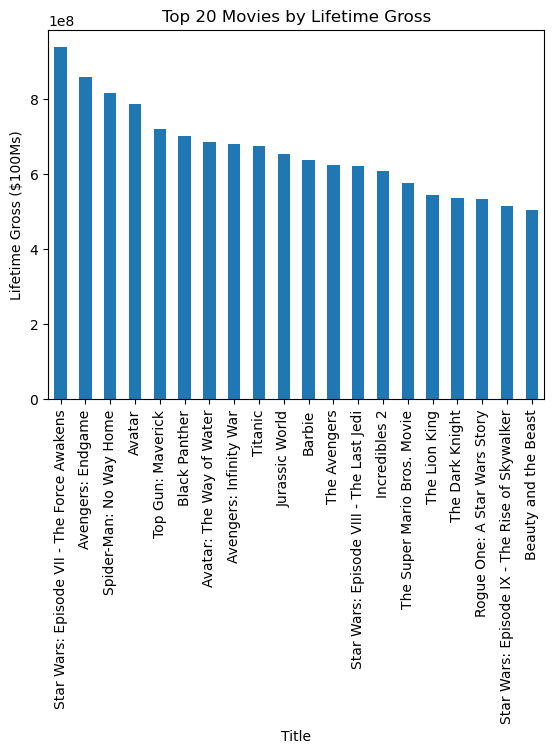

In [10]:
# Gather just the top 20 movies
top_20_movies = all_time_movies_df[:20]
# Build a bar chart using the 'Title' as the x-axis and 'Lifetime Gross' as the y-axis
top_20_movies.plot(kind='bar', x='Title', y='Lifetime Gross', legend=False, title='Top 20 Movies by Lifetime Gross', xlabel='Movie Title', ylabel='Lifetime Gross ($100Ms)')

## pandas for data scrapping conclusion
While this is only useful in situations where we have table data, using pandas [read_html](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html) function is a very simple way to get tabular data from a webpage.  It's a great tool to have in your toolbox.

### A couple things to try
* We only read the first 200 records of the top 1000 movies.  If you click the link to see the next page you'll see the URL changes to include a query parameter 'offset' (https://www.boxofficemojo.com/chart/top_lifetime_gross/?offset=200).  See if you can modify the query to get all 5 pages of results showing the top 1000 lifetime grossing movies.  
* Notice that on the page there is a link to each movie.  What if we wanted to get more information about each movie?  We could follow the link and scrape the data from the individual movie page.  This is a common pattern in web scraping.
* What can we do with the data, we've shown a quick example of getting the movies into a bar chart, is there another format or some other information that would be interesting to take a look it?  Maybe a pie chart of the top 10 movies?

# Gathering data using an API

As a data analyst, data is the fuel that drives the engine of discovery.  Often times this means using data we have collected with web forms, using external systems or via some business process.  Occassionally, we'll be given the data directly or we can download some data from a webpage that meets our needs.  Being able to gather data from sources on the web is a skill that is often very useful.  Wouldn't it be great if you could download [weather data predictions](https://www.abstractapi.com/api/weather#:~:text=What%20does%20the%20Weather%20API%20do%3F%20Abstract%27s%20Weather,and%20forecasted%20weather%20data%20for%20millions%20of%20locations.) as part of your morning routine, or grab [movies reviews](https://www.rottentomatoes.com/) to make plans for the weekend or even get data from the [James Webb Telescope](https://www.nasa.gov/mission_pages/webb/about/index.html) so you can process your own images from outer space!

Web APIs are a powerful tool for developers to access data and functionality from other applications. They allow developers to query data from a remote server and receive a response in a structured format, such as JSON or XML.

There are literally millions of web APIs available on the internet, some are private and only available to known and trusted business partners, many are available at a cost to the consumer and others are free.  Some have utilization caps for free use and expose more utilization and premium features to paying customers.  Here are just a very few commonly used, public APIs.

## Common third-party APIs

- The [Twitter API](https://developer.twitter.com/en/docs), which allows you to do things like displaying your latest tweets on your website.
- Map APIs, like [Mapquest](https://developer.mapquest.com/) and the [Google Maps API](https://developers.google.com/maps/), which allow you to do all sorts of things with maps on your web pages.
- The [Facebook](https://developers.facebook.com/docs/) suite of APIs, which enables you to use various parts of the Facebook ecosystem to benefit your app, such as by providing app login using Facebook login, accepting in-app payments, rolling out targeted ad campaigns, etc.
- The [Telegram APIs](https://core.telegram.org/api), which allows you to embed content from Telegram channels on your website, in addition to providing support for bots.
- The [YouTube API](https://developers.google.com/youtube/), which allows you to embed YouTube videos on your site, search YouTube, build playlists, and more.
- The [Pinterest API](https://developers.pinterest.com/), which provides tools to manage Pinterest boards and pins to include them in your website.
- The [Twilio API](https://www.twilio.com/), which provides a framework for building voice and video call functionality into your app, sending SMS/MMS from your apps, and more.

# Part 2 - Using a public API
It's not easy to find public APIs that don't require some kind of credentials.  The reason for is that when you provide credentials (usually an API "key"), the developer of the API can limit the number of requests your program makes and can determine which API calls are being used by a particular end-point.  There is cost to running an API, the cost of the compute resources, disk space and network traffic - all which can add up, so charging a little bit of money can help defray these costs and ensure that the endpoints requesting data are serious enough to spend a little money to make their application go.

While every API interaction is different (most APIs have documentation showing examples of how to call it), there are some basic principals/tools/patterns we can employ.  Here we'll look at an example that is very useful and gives a sense of the Python tools used to navigate the endpoint when you see something similar.

## Using the requests library
The [`requests`](https://requests.readthedocs.io/en/latest/) library is a very common library for automating the interaction with webpages.  There are lots and lots of features, we'll focus on just a few.  For more information, you can see the excellent documentation [here](https://requests.readthedocs.io/en/latest/).

There are several different request types that can be sent to a webpage (GET, PUT, DELETE, HEAD, et al). GET is used to navigate a static website, sometimes using query parameters as we have seen already.  PUT and POST are used to submit data on a form.  We'll leave the others for a more advanced treatise.  For our purposes, we'll just take a look at GET.  

Let's take a new example.  What if we want get the current price of bitcoin?

In [ ]:
import requests

# Create a variable to hold the end point of the API
url = 'https://api.coindesk.com/v1/bpi/currentprice.json'
# Using the requests library to make a GET request to the API, and store the response in a variable called response
response = requests.get(url)

# Print the response (as text)
print(response.text)

Well that is interesting, but clearly the response is JSON, so maybe we should try getting the response as JSON instead of text.  (There is no JSON type, JSON is stored as a dictionary so keep this in mind as we take a look at the next steps)

In [ ]:
import pprint

json_response = response.json()
print(f"The type of the json_response is {type(json_response)}\n\n")

# Print the response (as json), actually as a dictionary
pprint.pprint(response.json())

Of course we know how to do interesting things with dictionaries and then use the keys to get the data we want, so let's go ahead and get the current price of bitcoin in USD.

A side note here.  What we really have is a dictionary of dictionaries which also have dictionaries as their values.  This can be hard to conceptualize but let's try to break it down a bit.

We know we have a dictionary because it is surrounded in `{}`.  Let's take a look at the keys in the dictionary

In [ ]:
# Get the keys in the dictionary
print(f"\nThe keys in the dictionary are: {json_response.keys()}\n\n")

# Get the value associate with the bpi key
print(f"The value associated with the bpi key is: {json_response['bpi']}\n\n")

Okay so now we can see that the value associated with the `bpi` key is another dictionary.  Notice how the value starts with an `{`.  Let's repeat and get the keys in the new dictionary

In [ ]:
# Get the value associated with the value associated with the bpi key
bpi_dictionary = json_response['bpi']
# Get all the keys in the bpi dictionary
print(f"The keys in the bpi dictionary are: {bpi_dictionary.keys()}\n\n")

Perfect!  So we have gotten the VALUE associated with the bpi KEY and see it's a dictionary with three more keys 'USD', 'GBP', 'EUR'. This means we can get the values for each of these from the bpi_dictionary

In [ ]:
# Get the value of the bpi_dictionary associated with the USD key
usd_value = bpi_dictionary['USD']
print(f"The value of the bpi_dictionary associated with the USD key is: {usd_value}\n\n")   


Once again we see that the VALUE associated to the USD key of the bpi dictionary is itself another dictionary.  Let's get the keys for this new dictionary

In [ ]:
# Get the USD as a dictionary
usd_dictionary = bpi_dictionary['USD']

# Print the keys in the usd_dictionary
print(f"The keys in the usd_dictionary are: {usd_dictionary.keys()}\n\n")

# For each key in the usd_dictionary, print the key and the value   
for key in usd_dictionary.keys():
    print(f"The value associated with the {key} key is: {usd_dictionary[key]}")
    

Finally, we can see the values for each of the keys in the USD dictionary are string and numbers. No more dictionaries.  So now we get to the value we want.

In [ ]:
# Print the rate_float value associated with the USD dictionary
print(f"\nThe `rate_float` value associated with the USD dictionary is: {usd_dictionary['rate_float']}")

Next we'll put it all together into a single cell, and show you how to shortcut this into a single line of Python

In [ ]:
import requests
import pprint # import pretty print

# Create a variable to hold the end point of the API
url = 'https://api.coindesk.com/v1/bpi/currentprice.json'
# Using the requests library to make a GET request to the API, and store the response in a variable called response
response = requests.get(url)

# Get the response as json (as a dictionary)
json_response = response.json()
# Print the response as json just as a checkpoint
pprint.pprint(json_response)

# Get the bpi dictionary from the json_response
bpi_dictionary = json_response['bpi']
# Get the USD dictionary from the bpi dictionary
usd_dictionary = bpi_dictionary['USD']
# Get the rate_float value from the usd_dictionary
rate_float = usd_dictionary['rate_float']

# NOTE: \n is a special character that means "new line"
print(f"\nThe current price of Bitcoin in USD is {rate_float}\n")

# Here we are going to do the same thing as above, but in one line of code
bitcoin_in_usd = json_response['bpi']['USD']['rate_float']
print(f"\nThe current price of Bitcoin in USD is {bitcoin_in_usd}\n")


## YOUR TURN - Query a public API (Part 1)

Now it's your turn.  Starting from the top.  Make the request, but since you'll be running at a different time than the example, let's make sure to include the example.  I'd like to see the US, Euro, and British Pound exchange rate for bitcoin and the time in which you made the query.  Your result should look like:


```
The exchange rate for bitcoin at Sep 14, 2023 18:41:00 UTC:
 in GBP is 22326.7304
 in EUR is 26028.8456
 in USD is 26719.65
```

In [ ]:
import requests
import pprint # import pretty print

# Create a variable to hold the end point of the API
url = 'https://api.coindesk.com/v1/bpi/currentprice.json'
# Using the requests library to make a GET request to the API, and store the response in a variable called response
response = requests.get(url)

## YOUR TURN - Query a public API (Part 2)
One of the easiest ways to figure out what you are going to get back is to just post the query into a web browser and see what the result is.  You can try that with this next URL
```https://production.api.coindesk.com/v2/tb/price/ticker?assets=ETH,XRP,BTC```

Once you see what kind of data is returned from this query, repeat similar steps to the ones above, but this time give us the breakdown of the open and close values of each of the three coins (XRP, ETH and BTC).  

*HINT: the dictionary key `ohlc` represents (open, high, low, close), from here I presume you can figure out which sub-key applies to open and close*

Loop through each of the currencies so you don't need to have repetitive code in your solution.  Your output should look something like

```
The open price for ETH is: 46.23
The close price for ETC is: 46.24
The open price for XRP is: 46.23
The close price for XRP is: 46.24
The open price for BTC is: 46.23
The close price for BTC is: 46.24
```
**HINT 2 (optional):** to limit the decimal points in your print statements use the `:.2f` format like so ```print(f'{currency_value:.2f}')```

In [ ]:
# Start by writing out the algorithm in plain english first

## YOUR TURN - Query a public API (Part 3)
On [Zippopotam.us](https://www.zippopotam.us/), we can get useful information for zipcodes across the world.  To get information from different zipcodes, we just change the URL to have the zipcode we need in the URL.  For instance, 

`https://api.zippopotam.us/us/72712` gives us information for Bentonville, AR.  And if we change the last bit of the string we get another zip code `https://api.zippopotam.us/us/90210`.

This is super handy, so let's develop a little app that asks the user for the zip code we should be querying and then return them information about the zip code.  Here's what the end result should look like if we type 72712

```
Zipcode: 72712
Bentonville, AR US
```

**HINTS**
- I suggest trying to build your code to work with a fixed URL first.  In other words, pick one of the URLS above (or another) and use this as a starting point to build your program. Once you have got it working, then replace the fixed zip code with your user request.  This will save you from having to type in the zip code everytime you run the app while you are developing it
- You can use the `input()` function to get input from the user at runtime
- Remember that JSON can return dictionaries of dictionaries like we've seen above, but the elements may also be lists, which could be lists of dictionaries or lists of lists.  The best idea is to break it down one step at a time, like we did above until you get to the exact item you are looking for before trying to put it all into a single line of Python code
- It may be helpful to build your code in VS Code as a python file instead of a Jupyter notebook so that you can use the debugger.  Build it there and paste into the notebook when you are finished if you like.


In [ ]:
# Start by writing out the algorithm in plain english first